### Find imports and exports

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import NO_NODES

CASE = "NOgrid" #NOgrid
NO_NODES_INCL_ONSHR = NO_NODES + [f"NO{i}" for i in range(1, 6)]

df = pd.read_csv(f"Results/{CASE}/results_output_Operational.csv")
df = df[df["Node"].isin(NO_NODES_INCL_ONSHR)]
df

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
397440,NO1,2020-2025,scenario1,winter,1,2608.850092,-4208.730947,-2608.850092,0.0,0.0,...,-0.000488,0.000502,708.704684,-0.000071,-0.002847,1649.364627,-49.480939,4.432132e-08,24.260414,1.157999e-08
397441,NO1,2020-2025,scenario1,winter,2,2587.116442,-4179.261068,-2587.116442,0.0,0.0,...,-0.000519,0.000473,708.704654,-0.000077,-0.002861,1641.389210,-49.241676,4.431939e-08,24.260414,1.126300e-08
397442,NO1,2020-2025,scenario1,winter,3,2585.271955,-4257.384049,-2585.271955,0.0,0.0,...,-0.000530,0.000462,708.704643,-0.000079,-0.002877,1723.829936,-51.714898,4.431747e-08,24.260414,1.125422e-08
397443,NO1,2020-2025,scenario1,winter,4,2607.395033,-4377.326275,-2607.395032,0.0,0.0,...,-0.000487,0.000428,708.704631,-0.000071,-0.002716,1824.674245,-54.740227,4.428886e-08,24.260414,1.115538e-08
397444,NO1,2020-2025,scenario1,winter,5,2583.891925,-4520.550244,-2583.891925,0.0,0.0,...,-0.000538,0.000456,708.704634,-0.000080,-0.002909,1996.558052,-59.896742,4.431448e-08,24.260414,1.123710e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157755,SørvestD,2055-2060,scenario3,peak2,716,0.006819,-0.000000,-0.006819,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.061921,0.056803,-0.001704,3.166575e-06,1.860447,0.000000e+00
1157756,SørvestD,2055-2060,scenario3,peak2,717,0.005698,-0.000000,-0.005698,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.061325,0.057344,-0.001720,3.166568e-06,1.916995,0.000000e+00
1157757,SørvestD,2055-2060,scenario3,peak2,718,0.006241,-0.000000,-0.006241,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.060409,0.055840,-0.001675,3.167007e-06,2.524224,0.000000e+00
1157758,SørvestD,2055-2060,scenario3,peak2,719,0.006203,-0.000000,-0.006203,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.060390,0.055860,-0.001676,3.166995e-06,2.527079,0.000000e+00


In [213]:
winter_hours = [1, 168] # 168
spring_hours = [169, 336] # 168
summer_hours = [337, 504] # 168
fall_hours = [505, 672] # 168
peak1_hours = [673, 696] # 24
peak2_hours = [697, 720] # 24

Calculate mean values of scenarios 

In [214]:
df = df.groupby(["Node", "Period", "Hour"]).mean(numeric_only=True).reset_index()
df

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,NO1,2020-2025,1,2339.773322,-5054.756816,-2339.773322,0.0,0.0,0.0,0.0,...,-0.000900,0.000382,708.705131,-0.000157,-0.002099,2798.954754,-83.968643,4.433787e-08,37.305406,0.002060
1,NO1,2020-2025,2,2337.464512,-5060.382938,-2337.464512,0.0,0.0,0.0,0.0,...,-0.000986,0.000366,708.705578,-0.000173,-0.002122,2807.135225,-84.214057,4.434637e-08,37.305406,0.002094
2,NO1,2020-2025,3,2333.029427,-5064.894000,-2333.029427,0.0,0.0,0.0,0.0,...,-0.001012,0.000357,708.706055,-0.000178,-0.002131,2816.358101,-84.490743,4.434396e-08,37.305408,0.002334
3,NO1,2020-2025,4,2332.533926,-4989.972707,-2332.533926,0.0,0.0,0.0,0.0,...,-0.001005,0.000345,708.706538,-0.000176,-0.002078,2739.630432,-82.188913,4.433302e-08,37.305406,0.002096
4,NO1,2020-2025,5,2318.115183,-4927.771473,-2318.115183,0.0,0.0,0.0,0.0,...,-0.001023,0.000355,708.707026,-0.000180,-0.002140,2690.370204,-80.711106,4.434077e-08,37.305406,0.002042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143995,VestavindF,2055-2060,716,0.002909,0.000000,-0.002909,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.052275,0.050889,-0.001527,3.529576e-06,346.346311,0.000000
143996,VestavindF,2055-2060,717,0.003099,0.000000,-0.003099,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.052471,0.050895,-0.001527,3.529408e-06,346.330643,0.000000
143997,VestavindF,2055-2060,718,0.003513,0.000000,-0.003513,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.052805,0.050814,-0.001524,3.529479e-06,346.505637,0.000000
143998,VestavindF,2055-2060,719,0.003763,0.000000,-0.003763,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-0.049844,0.047502,-0.001425,3.527984e-06,346.422376,0.000000


In [215]:
def calc_net_exports(df_row):
    return (-df_row["FlowOut_MW"]) - (df_row["FlowIn_MW"] + df_row["LossesFlowIn_MW"]) # Note signs from data set

def calc_revenue_net_exports(df_row):
    # If positive: Received from exports; If negative: Paid for imports
    return df_row["Net exports (MWh)"] * df_row["Price_EURperMWh"]

df["Net exports (MWh)"] = df.apply(lambda row: calc_net_exports(row), axis=1)
df["Price of net exports (EUR)"] = df.apply(lambda row: calc_revenue_net_exports(row), axis=1)

net_exports_by_hour_MWh = list(df.groupby(by=["Period", "Hour"])["Net exports (MWh)"].sum())
revenue_net_exports_by_hour_EUR = list(df.groupby(by=["Period", "Hour"])["Price of net exports (EUR)"].sum())
hours = [i+1 for i in range(len(net_exports_by_hour_MWh))]

Net exports Norway incl. OWPs (TWh)


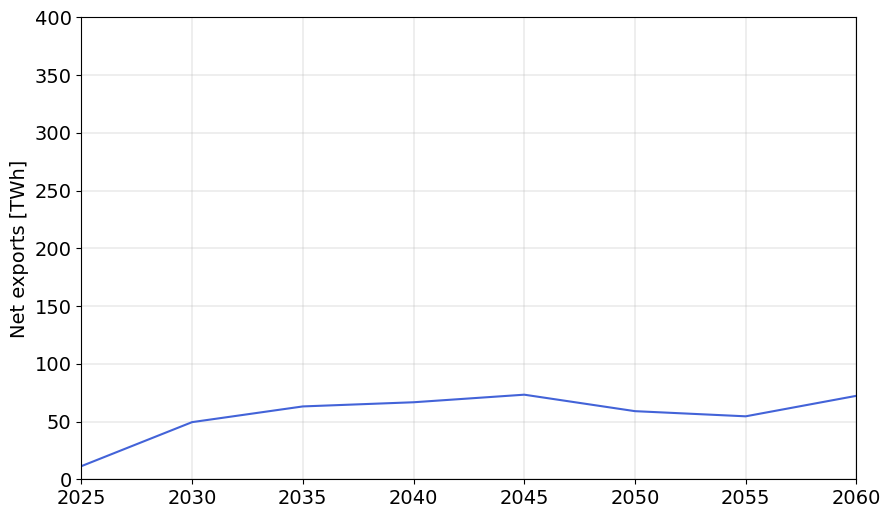

Average net export per year: 56.2 TWh


In [216]:
# Scale hours to obtain true number of hours in a year
SCALING_FACTOR = (365*24) * 5 / 720

print("Net exports Norway incl. OWPs (TWh)")

net_exports_by_hour_TWh = [x/10**6 * SCALING_FACTOR for x in net_exports_by_hour_MWh]
net_exports_by_period_TWh = [sum(net_exports_by_hour_TWh[(720*i-720):(720*i)]) for i in range(1, 9)]
net_exports_per_year_by_period_TWh = [x/5 for x in net_exports_by_period_TWh]

years = [i for i in range(len(net_exports_per_year_by_period_TWh))]

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

plt.plot(years, net_exports_per_year_by_period_TWh, color="#4363d8")
plt.ylabel("Net exports [TWh]")
plt.margins(x=0)
plt.ylim(0, 400)

# Change ticks
plt.xticks(ticks=[i for i in range(8)], labels=[2025+5*i for i in range(8)])
plt.savefig(f"SavedFigs/NetExports/Volume-Norway-{CASE}", bbox_inches='tight')
plt.show()

print(f"Average net export per year: {round(sum(net_exports_by_hour_TWh)/40, 1)} TWh")

Revenue from net exports (BEUR)


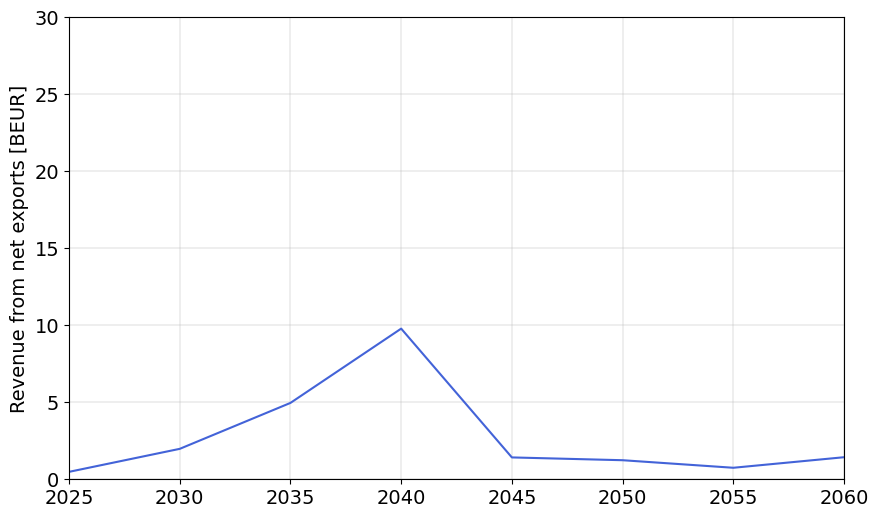

Revenue of net exports per year: 2.8 BEUR


In [217]:
print("Revenue from net exports (BEUR)")

revenue_net_exports_by_hour_BEUR = [x/10**9 * SCALING_FACTOR for x in revenue_net_exports_by_hour_EUR]
revenue_net_exports_by_period_BEUR = [sum(revenue_net_exports_by_hour_BEUR[(720*i-720):(720*i)]) for i in range(1, 9)]
revenue_net_exports_per_year_by_period_BEUR = [x/5 for x in revenue_net_exports_by_period_BEUR]

years = [i for i in range(len(revenue_net_exports_per_year_by_period_BEUR))]

plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

plt.plot(years, revenue_net_exports_per_year_by_period_BEUR, color="#4363d8")
plt.ylabel("Revenue from net exports [BEUR]")
plt.margins(x=0)
plt.ylim(0, 30)

# Change ticks
plt.xticks(ticks=[i for i in range(8)], labels=[2025+5*i for i in range(8)])
plt.savefig(f"SavedFigs/NetExports/Revenue-Norway-{CASE}", bbox_inches='tight')
plt.show()

print(f"Revenue of net exports per year: {round(sum(revenue_net_exports_by_hour_BEUR)/40, 1)} BEUR")

In [218]:
average_consumption_NO_in_period_TWh = (145+373) / 2 # TWh, simplified https://www.norskindustri.no/siteassets/dokumenter/rapporter-og-brosjyrer/energy-transition-norway/2023/energy-transition-norway-2023.pdf (p. 29)
print(average_consumption_NO_in_period_TWh)

# From base case to NOgrid (NO2) in 2050
additional_cost_EUR_per_MWh = 6.1

additional_cost_for_consumers_BEUR = round((average_consumption_NO_in_period_TWh * 10**6 * additional_cost_EUR_per_MWh) / 10**9, 1)
print(f"Additional cost for Norwegian consumers (annually): {additional_cost_for_consumers_BEUR} BEUR")

base_case_avg_export_revenues_BEUR = 10.2
NOgrid_avg_export_revenues_BEUR = 2.8
print(f"Foregone export revenues: {round(base_case_avg_export_revenues_BEUR-NOgrid_avg_export_revenues_BEUR, 1)} BEUR")

259.0
Additional cost for Norwegian consumers (annually): 1.6 BEUR
Foregone export revenues: 7.4 BEUR
